# Name : Gobinath Periyasamy
# Roll No : CS21M501

## (2) iii. Code the stochastic gradient descent algorithm using batch size of 100 and plot abs(wt − wML) Square norm as a function of t. What are your observations?

### Code the stochastic gradient descent algorithm

In [5]:
# import libraries

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster,datasets, mixture
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from numpy import linalg as LA

In [6]:
# import Excel A2Q1 data:
df_train = pd.read_csv("A2Q2Data_train.csv",header = None)
df_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.58351,0.379390,0.839750,0.086861,0.611920,0.39203,0.189640,0.585090,0.89494,0.393850,...,0.51706,0.20535,0.829990,0.24995,0.319800,0.19674,0.958550,0.849480,0.923690,1.9741
1,0.86622,0.451350,0.934790,0.235810,0.504880,0.49742,0.117220,0.574880,0.71051,0.336890,...,0.27412,0.46065,0.655440,0.56656,0.490620,0.19920,0.320680,0.414190,0.830230,2.3354
2,0.39142,0.919950,0.138730,0.991810,0.543670,0.98449,0.340260,0.206470,0.40131,0.128990,...,0.27247,0.38911,0.799490,0.57753,0.866820,0.69741,0.628630,0.294790,0.542800,2.2053
3,0.79553,0.278540,0.228900,0.789290,0.492220,0.67084,0.769410,0.057104,0.20393,0.086936,...,0.24901,0.65976,0.943350,0.41246,0.927150,0.11015,0.101310,0.668010,0.345730,2.0400
4,0.65223,0.966650,0.179850,0.354060,0.840420,0.92891,0.014597,0.229530,0.43920,0.548940,...,0.93277,0.23674,0.027077,0.27111,0.233660,0.56356,0.047289,0.627920,0.979300,2.2053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.13627,0.056966,0.229530,0.343080,0.019914,0.29071,0.124340,0.523650,0.80031,0.120490,...,0.23140,0.75825,0.418120,0.33551,0.361130,0.12088,0.050074,0.335240,0.040619,3.0543
9996,0.95662,0.141930,0.978510,0.782700,0.198780,0.29844,0.331600,0.302100,0.68403,0.827360,...,0.47084,0.71044,0.323540,0.65593,0.043369,0.69314,0.672490,0.573740,0.110510,2.3255
9997,0.89209,0.997530,0.880430,0.813160,0.294460,0.40088,0.198950,0.402530,0.98442,0.746290,...,0.64760,0.86836,0.227950,0.92668,0.735700,0.77533,0.827720,0.331150,0.928750,2.0964
9998,0.70381,0.422940,0.259230,0.230480,0.710920,0.27516,0.843470,0.338950,0.22252,0.586820,...,0.76356,0.00795,0.569030,0.93311,0.501910,0.36688,0.822460,0.498100,0.060471,1.8405


### stochastic gradient descent algorithm using batch size of 100

In [11]:
# Data import and Manipulation done in previous problem
feature_train_w  = 0
X_train_w = df_train.iloc[:,:-1]
Y_train_w = df_train.iloc[::,-1:]
#iterating through the whole file
for row_train in X_train_w:
    feature_train_w= feature_train_w + 1
f_train_w = feature_train_w
n_train_w = len(df_train)


X_train_w = X_train_w.to_numpy()
y_train_w = Y_train_w.to_numpy()
#MSE_list,w_Stoch_grad_list = [],[]
for i in range(100):
    np.random.shuffle(X_train_w)
    X_train = X_train_w[::100,::]
    y_train = y_train_w[::100,::]
    feature_train  = 0
    for row_train in X_train:
        feature_train= feature_train + 1
    f_train = feature_train
    n_train = len(X_train)

    w_ml = np.dot(np.dot(LA.inv(np.dot(X_train.T, X_train)),X_train.T),y_train)
    #print("w_ml: ",w_ml.reshape(f_train),'\n')

    MSE = (1/n_train)*(LA.norm(X_train@w_ml - y_train))**2
    
    #MSE_list.append(MSE)

    eta = 0.0001
    w_Stoch_grad = np.random.randn(f_train,1)
    loss1 = []
    diff = []

    for i in range(1100):
        w_Stoch_grad = w_Stoch_grad -eta * (X_train.T@(X_train@w_Stoch_grad - y_train))
        diff.append(LA.norm(w_Stoch_grad - w_ml))
    #w_Stoch_grad_list.append(w_Stoch_grad)
    diff = np.array(diff)
    diff
    
    
#MSE = sum(MSE_list)/100
#print("Final Mean Squared Error on train set using w_ML ",MSE)

#w_Stoch_grad = sum(w_Stoch_grad_list)/100
#print("Final Mean Squared Error on train set using w_ML ",(1/n_train)*(LA.norm(X_train@w_Stoch_grad - y_train))**2)


df_test = pd.read_csv("A2Q2Data_test.csv",header = None)

feature_test  = 0
X_test = df_test.iloc[:,:-1]
Y_test = df_test.iloc[::,-1:]
#iterating through the whole file
for row_test in X_test:
    feature_test = feature_test + 1
f_test = feature_test
n_test = len(df_test)

X_test = X_test.to_numpy()
y_test = Y_test.to_numpy()

#print("Final Mean Squared Error on test set using w_Stoch_grad ",(1/n_test)*(LA.norm(X_test@w_Stoch_grad - y_test))**2)


# Calculating Mean Square Error for 

print("Final Mean Squared Error on train set using w_Stoch_grad ",(1/n_train)*(LA.norm(X_train@w_Stoch_grad - y_train))**2)

print("Final Mean Squared Error on test set using w_Stoch_grad ",(1/n_test)*(LA.norm(X_test@w_Stoch_grad - y_test))**2)


Final Mean Squared Error on train set using w_Stoch_grad  0.8469540931983484
Final Mean Squared Error on test set using w_Stoch_grad  2.2647865985560536


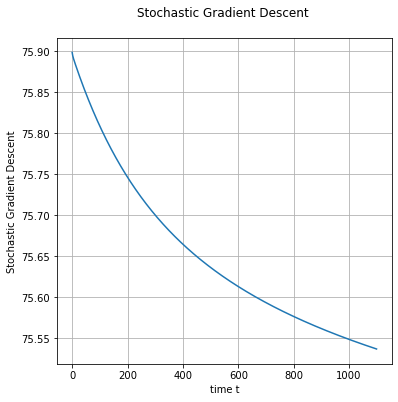

In [12]:
plt.figure(figsize = (6,6))
plt.xlabel('time t')
plt.ylabel('Stochastic Gradient Descent')
plt.title('Stochastic Gradient Descent \n')
plt.plot(diff)
plt.grid()
# visualizing plot using matplotlib.pyplot library
plt.show()

## Final Mean Squared Error on train set using Stochastic Gradient Descent  0.8469540931983484

## Final Mean Squared Error on test set using Stochastic Gradient Descent  2.2647865985560536

### What are your observations?


#### The Mean Sqaured Error we get using the Gradient descent is little away from the  to the  Mean Sqaured Error found using  least squares solution wML.
#### But the descent gradient is towards the Mean Square Error.
#### The batch size of 100 is descending towards the minimum Descent which is good, but not exactly to it for this data.
#### The Stochastic Gradient Descent can be applicable for Larger data where larger n number of iterations are needed.